In [1]:
# -*- coding: UTF-8 -*-
# @ Author : XIA ZIHANG


import pandas as pd
import numpy as np
df = pd.read_csv("file.csv")
df.isna().sum()

df


,T,direction32,ws30,dir10,mslp,clc,senf,latf,swr,lwr,ps,T2m,RH2m,showtime,Time,month,power
0,258.46,219.23,4.44,219.94,1025.92,99.49,0.43,-2.74,2.11,-29.22,894.86,250.94,79.79,2019/1/2 0:00,0,2,0.0
1,258.43,220.44,4.65,222.10,1025.80,94.81,0.47,-2.69,2.49,-30.08,894.77,250.94,79.74,2019/1/2 0:15,1,2,0.0
2,258.44,221.27,5.01,223.38,1025.73,85.64,0.51,-2.51,3.23,-31.32,894.72,250.95,79.64,2019/1/2 0:30,2,2,0.0
3,258.46,222.11,5.38,224.64,1025.66,76.47,0.55,-2.32,3.97,-32.55,894.66,250.96,79.55,2019/1/2 0:45,3,2,0.0
4,258.47,222.94,5.74,225.92,1025.60,67.30,0.59,-2.14,4.71,-33.79,894.61,250.97,79.45,2019/1/2 1:00,4,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69597,259.33,254.62,7.71,260.02,1037.48,76.46,-1.09,12.20,1.81,-38.81,906.09,258.62,79.45,2020/12/31 22:45,91,12,0.0
69598,259.30,254.88,7.62,260.44,1037.45,77.15,-1.04,11.69,1.81,-38.39,906.03,258.59,79.48,2020/12/31 23:00,92,12,0.0
69599,259.27,255.34,7.52,260.99,1037.41,77.37,-1.00,11.27,1.80,-38.85,906.02,258.56,79.56,2020/12/31 23:15,93,12,0.0
69600,259.25,256.01,7.41,261.69,1037.36,77.13,-0.96,10.94,1.78,-40.18,906.03,258.53,79.66,2020/12/31 23:30,94,12,0.0


<AxesSubplot:xlabel='showtime'>

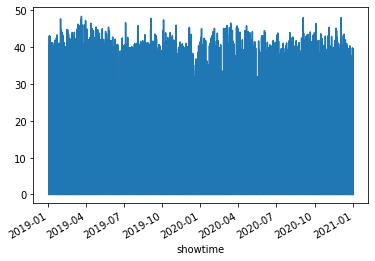

In [2]:
df['showtime'] = pd.to_datetime(df['showtime'])
df.set_index(['showtime'],inplace=True)


df

#應變量
df.power.plot()

In [3]:

# 拆分
df2 = df[0:5000] # 暂时只用5000个点，算得快 
df = df2
train = df[0:4000]
test = df[4000:]

#正規化
# 全都落在0-1之间
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
norm_data

Y_test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns, index=test.index)


Y_test_2 = Y_test
Y_test

,T,direction32,ws30,dir10,mslp,clc,senf,latf,swr,lwr,ps,T2m,RH2m,Time,month,power
showtime,,,,,,,,,,,,,,,,
2019-02-12 16:00:00,0.965150,0.595281,0.467409,0.607531,0.864146,0.030238,0.942308,0.774140,0.004853,0.333365,0.956941,0.654284,0.422294,0.673684,1.0,0.612801
2019-02-12 16:15:00,0.964182,0.595344,0.479332,0.607060,0.865808,0.030238,0.943198,0.777752,0.004853,0.338495,0.955656,0.647693,0.431404,0.684211,1.0,0.547728
2019-02-12 16:30:00,0.961278,0.595689,0.489666,0.606794,0.866639,0.030331,0.943910,0.781912,0.004853,0.343245,0.952442,0.641102,0.433548,0.694737,1.0,0.469372
2019-02-12 16:45:00,0.958374,0.596034,0.499205,0.606529,0.867470,0.030331,0.944444,0.786152,0.004822,0.347900,0.949871,0.635111,0.435155,0.705263,1.0,0.358786
2019-02-12 17:00:00,0.955470,0.596379,0.509539,0.606263,0.868301,0.030425,0.945157,0.790312,0.004822,0.352651,0.946658,0.628520,0.437299,0.715789,1.0,0.208673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-23 00:45:00,0.692159,0.752902,0.549285,0.756893,0.784379,0.882900,0.882123,0.855707,0.053259,0.785484,0.978792,0.759137,0.712219,0.031579,0.0,0.000000
2019-02-23 01:00:00,0.691191,0.750988,0.543720,0.755389,0.787287,0.864494,0.879808,0.854608,0.073262,0.769523,0.983290,0.758538,0.705788,0.042105,0.0,0.000000
2019-02-23 01:15:00,0.692159,0.751177,0.538951,0.755772,0.787703,0.856700,0.871439,0.848092,0.100513,0.764488,0.985861,0.759736,0.698821,0.052632,0.0,0.000000


In [4]:
#製造X跟Y(RD)
import tqdm
n = 30 #改n即可，資料1/4起，所以能預測的第一個Y為2/3，抓30天
feature_names = list(norm_data.drop('power', axis=1).columns)
X = []
y = []
indexes = []
norm_data_x = norm_data[feature_names]
for i in (tqdm.trange(0,len(norm_data)-n)): # 小小进度条hhh娱乐功能
  X.append(norm_data_x.iloc[i:i+n]. values) 
  y.append(norm_data['power'].iloc[i+n-1]) #現有資料+30天的Y
  indexes.append(norm_data.index[i+n-1]) #Y的日期

print(X[0])
print(y[0])


100%|██████████| 3970/3970 [00:00<00:00, 49625.34it/s]

[[0.11920792 0.6094607  0.28337875 0.61101367 0.50493135 0.97488773
  0.97285297 0.84708807 0.00244203 0.88113682 0.28701595 0.07544558
  0.82499667 0.         0.09090909]
 [0.11861386 0.61282958 0.29768392 0.6170272  0.50261071 0.93199523
  0.97310669 0.84724538 0.00291549 0.87689347 0.28408721 0.07544558
  0.82432973 0.01052632 0.09090909]
 [0.11881188 0.61514046 0.32220708 0.62059077 0.50125701 0.84795161
  0.9733604  0.84781172 0.00383748 0.87077515 0.28246014 0.07561862
  0.82299587 0.02105263 0.09090909]
 [0.11920792 0.61747919 0.34741144 0.62409867 0.49990331 0.76390798
  0.97361411 0.84840953 0.00475947 0.86470617 0.28050765 0.07579166
  0.82179538 0.03157895 0.09090909]
 [0.11940594 0.61979007 0.3719346  0.62766224 0.49874299 0.67986436
  0.97386782 0.84897587 0.00568146 0.85858785 0.27888057 0.0759647
  0.82046152 0.04210526 0.09090909]
 [0.12118812 0.62377147 0.39441417 0.63320248 0.49700251 0.66043442
  0.97443867 0.8502344  0.01682012 0.86184438 0.27660267 0.0776951
  0.81

In [5]:

X=np.array(X) # RD外的6個自變量，記憶體=30，EX:預測12/31的Y，用12/1~12/30的X
y=np.array(y)
print(X.shape)
print(y.shape)


(3970, 30, 15)
(3970,)


In [6]:

# Adding the LSTM layer
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
n_steps = 30 
n_features = 15
model = Sequential()
# 50是神经元数量，

epochs_num = 20
neural_num=50
model.add(LSTM(neural_num,activation='relu', return_sequences=False, input_shape = (n_steps, n_features))) 



#input_shape = (n_steps, n_features)  幾步, 幾個特徵
# return_sequences預設false，輸出是否為序列? 是: 輸出多個值
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mse','mape'])

#%%
history = model.fit(X,y,batch_size=100,epochs=epochs_num)


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.0700 - mse: 0.0700 - mape: 85365544.0000
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0436 - mse: 0.0436 - mape: 57157296.0000
Epoch 3/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0264 - mse: 0.0264 - mape: 41910032.0000
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0168 - mse: 0.0168 - mape: 31495442.0000
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0122 - mse: 0.0122 - mape: 24226880.0000
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0094 - mse: 0.0094 - mape: 20309022.0000
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0079 - mse: 0.0079 - mape: 18047872.0000
Epoch 8/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - mape: 15675132.0000
Epoch 9/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0070 -

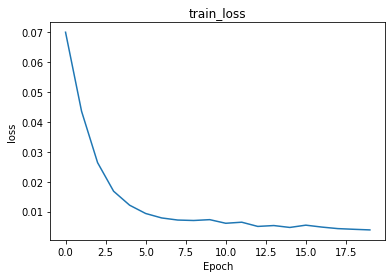

In [7]:




# 顯示loss
import matplotlib.pyplot as plt

plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])



In [8]:
n = 30
X = []
y = []
feature_names = list(Y_test.drop('power', axis=1).columns)
indexes = []
Y_test_x = Y_test[feature_names]

for i in (tqdm.trange(0,len(test)-n)): 
  X.append(Y_test_x.iloc[i:i+n].values) 
  y.append(Y_test['power'].iloc[i+n-1]) #現有資料+30天的Y
  indexes.append(test.index[i+n-1]) #Y的日期
X_test=np.array(X) # power外的15個自變量，記憶體=30，EX:預測12/31的Y，用12/1~12/30的X
y=np.array(y)
x_test_pd = pd.DataFrame(Y_test_x)
Y_test = pd.DataFrame(y)

100%|██████████| 970/970 [00:00<00:00, 44093.63it/s]


In [9]:

X_test.shape

(970, 30, 15)

In [10]:

predictions = model.predict(X_test)
predictions = pd.DataFrame(predictions).rename(columns={0: '預測值'})
Y_test2 = pd.DataFrame(Y_test).rename(columns={0: '實際值'})

final = pd.concat([predictions,Y_test2],axis=1)


# 用于将小于零的变为0 
final['預測值'] = final['預測值'].apply(lambda x:0 if x <= 0 else x)


final['mae'] = abs(final['預測值'] - final['實際值'])
# final.to_csv('final.csv')
final


31/31 [==============================] - 0s 1ms/step


,預測值,實際值,mae
0,0.000000,0.0,0.000000
1,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000
3,0.039963,0.0,0.039963
4,0.032247,0.0,0.032247
...,...,...,...
965,0.030865,0.0,0.030865
966,0.032911,0.0,0.032911
967,0.035034,0.0,0.035034
968,0.037042,0.0,0.037042


In [11]:
# ABC = scaler.inverse_transform(final)
# ABC

# model.r2score(final['實際值'],predictions)

AttributeError: 'Sequential' object has no attribute 'score'

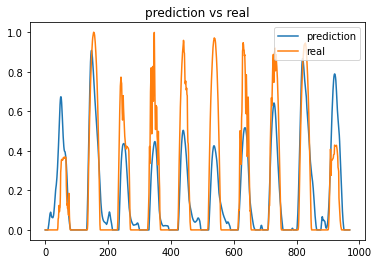

In [ ]:
plt.title('prediction vs real')
plt.plot(final.index,final['預測值'],label='prediction')
plt.plot(final.index,final['實際值'],label='real')
# plt.legend('prediction',' real')
plt.legend()

In [ ]:


Y_test_2


Y_test = pd.DataFrame(scaler.inverse_transform(Y_test_2), columns=Y_test_2.columns, index=Y_test_2.index)


Y_test


,T,direction32,ws30,dir10,mslp,clc,senf,latf,swr,lwr,ps,T2m,RH2m,Time,month,power
showtime,,,,,,,,,,,,,,,,
2019-02-12 16:00:00,267.01,211.84,6.10,212.86,1039.97,-0.01,0.21,3.80,1.79,-72.74,908.81,262.24,83.85,64.0,12.0,27.426400
2019-02-12 16:15:00,267.00,211.86,6.25,212.70,1040.01,-0.01,0.26,4.26,1.79,-72.20,908.79,262.13,84.02,65.0,12.0,24.514000
2019-02-12 16:30:00,266.97,211.97,6.38,212.61,1040.03,0.00,0.30,4.79,1.79,-71.70,908.74,262.02,84.06,66.0,12.0,21.007133
2019-02-12 16:45:00,266.94,212.08,6.50,212.52,1040.05,0.00,0.33,5.33,1.78,-71.21,908.70,261.92,84.09,67.0,12.0,16.057734
2019-02-12 17:00:00,266.91,212.19,6.63,212.43,1040.07,0.01,0.37,5.86,1.78,-70.71,908.65,261.81,84.13,68.0,12.0,9.339333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-23 00:45:00,264.19,262.08,7.13,263.51,1038.05,90.79,-3.17,14.19,17.35,-25.15,909.15,263.99,89.26,3.0,2.0,0.000000
2019-02-23 01:00:00,264.18,261.47,7.06,263.00,1038.12,88.83,-3.30,14.05,23.78,-26.83,909.22,263.98,89.14,4.0,2.0,0.000000
2019-02-23 01:15:00,264.19,261.53,7.00,263.13,1038.13,88.00,-3.77,13.22,32.54,-27.36,909.26,264.00,89.01,5.0,2.0,0.000000


In [20]:
### 核心

# predictions = pd.DataFrame(scaler.inverse_transform(predictions), columns=predictions.columns, index=predictions.index)
# revers = pd.concat([Y_test_x,predictions],axis=1)
# predictions2 = scaler.inverse_transform(revers.values)
# norm_data


Y_test_2['power_1'] = final['預測值']

Y_test_2
final['預測值']
Y_test_2


,T,direction32,ws30,dir10,mslp,clc,senf,latf,swr,lwr,ps,T2m,RH2m,Time,month,power,power_1
showtime,,,,,,,,,,,,,,,,,
2019-02-12 16:00:00,0.965150,0.595281,0.467409,0.607531,0.864146,0.030238,0.942308,0.774140,0.004853,0.333365,0.956941,0.654284,0.422294,0.673684,1.0,NaN,NaN
2019-02-12 16:15:00,0.964182,0.595344,0.479332,0.607060,0.865808,0.030238,0.943198,0.777752,0.004853,0.338495,0.955656,0.647693,0.431404,0.684211,1.0,NaN,NaN
2019-02-12 16:30:00,0.961278,0.595689,0.489666,0.606794,0.866639,0.030331,0.943910,0.781912,0.004853,0.343245,0.952442,0.641102,0.433548,0.694737,1.0,NaN,NaN
2019-02-12 16:45:00,0.958374,0.596034,0.499205,0.606529,0.867470,0.030331,0.944444,0.786152,0.004822,0.347900,0.949871,0.635111,0.435155,0.705263,1.0,NaN,NaN
2019-02-12 17:00:00,0.955470,0.596379,0.509539,0.606263,0.868301,0.030425,0.945157,0.790312,0.004822,0.352651,0.946658,0.628520,0.437299,0.715789,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-23 00:45:00,0.692159,0.752902,0.549285,0.756893,0.784379,0.882900,0.882123,0.855707,0.053259,0.785484,0.978792,0.759137,0.712219,0.031579,0.0,NaN,NaN
2019-02-23 01:00:00,0.691191,0.750988,0.543720,0.755389,0.787287,0.864494,0.879808,0.854608,0.073262,0.769523,0.983290,0.758538,0.705788,0.042105,0.0,NaN,NaN
2019-02-23 01:15:00,0.692159,0.751177,0.538951,0.755772,0.787703,0.856700,0.871439,0.848092,0.100513,0.764488,0.985861,0.759736,0.698821,0.052632,0.0,NaN,NaN


In [ ]:


Y_test = pd.DataFrame(scaler.inverse_transform(Y_test_2), columns=Y_test_2.columns, index=Y_test_2.index)
# Y_test = pd.DataFrame(scaler.inverse_transform(Y_test), columns=df.columns, index=norm_data.index)
# predictions2[-1]


Y_test['power']
Y_test_2['power_real'] = Y_test_2['power']
result = pd.concat([Y_test['power'],Y_test_2['power_real']],axis=1)

result['mae'] = abs(result['power'] - result['power_real'])
# result.to_csv('result.csv')
result




In [ ]:


Y_test

,T,direction32,ws30,dir10,mslp,clc,senf,latf,swr,lwr,ps,T2m,RH2m,Time,month,power
showtime,,,,,,,,,,,,,,,,
2019-02-12 16:00:00,267.01,211.84,6.10,212.86,1039.97,-0.01,0.21,3.80,1.79,-72.74,908.81,262.24,83.85,64.0,12.0,NaN
2019-02-12 16:15:00,267.00,211.86,6.25,212.70,1040.01,-0.01,0.26,4.26,1.79,-72.20,908.79,262.13,84.02,65.0,12.0,NaN
2019-02-12 16:30:00,266.97,211.97,6.38,212.61,1040.03,0.00,0.30,4.79,1.79,-71.70,908.74,262.02,84.06,66.0,12.0,NaN
2019-02-12 16:45:00,266.94,212.08,6.50,212.52,1040.05,0.00,0.33,5.33,1.78,-71.21,908.70,261.92,84.09,67.0,12.0,NaN
2019-02-12 17:00:00,266.91,212.19,6.63,212.43,1040.07,0.01,0.37,5.86,1.78,-70.71,908.65,261.81,84.13,68.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-23 00:45:00,264.19,262.08,7.13,263.51,1038.05,90.79,-3.17,14.19,17.35,-25.15,909.15,263.99,89.26,3.0,2.0,NaN
2019-02-23 01:00:00,264.18,261.47,7.06,263.00,1038.12,88.83,-3.30,14.05,23.78,-26.83,909.22,263.98,89.14,4.0,2.0,NaN
2019-02-23 01:15:00,264.19,261.53,7.00,263.13,1038.13,88.00,-3.77,13.22,32.54,-27.36,909.26,264.00,89.01,5.0,2.0,NaN
